## Step 1. Summarize Statistics

### 1.1 Loading evaluted result

In [1]:
import os
import pandas as pd

def csv_to_dict(directory):
    csv_dict = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            key = filename[:-4]  # Remove '.csv' extension
            with open(filepath, 'r', newline='') as csvfile:
                df = pd.read_csv(directory+filename)
                csv_dict[key] = df
    return csv_dict

results = csv_to_dict('./')

In [2]:
results = dict(sorted(results.items()))

In [3]:
for k, v in results.items():
    print(k)
    print(v.info())
    print()

base-iam
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  object 
 1   true_text       10000 non-null  object 
 2   predicted_text  7314 non-null   object 
 3   metrics         10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB
None

base-imgur
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  object 
 1   true_text       10000 non-null  object 
 2   predicted_text  9359 non-null   object 
 3   metrics         10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB
None

small-iam
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4

In [4]:
for k, v in results.items():
    print(k)
    print(v.head())
    print()

base-iam
        id true_text predicted_text   metrics
0  9nnEwB6       the            NaN  1.000000
1  8nxeyKk    again,          again  0.166667
2  H4XMzaK       THE           TIME  0.666667
3  PudMTjE        of             of  0.000000
4  lWv2lYs        J,            NaN  1.000000

base-imgur
        id true_text predicted_text   metrics
0  9nnEwB6       the            the  0.000000
1  8nxeyKk    again,          again  0.166667
2  H4XMzaK       THE            THE  0.000000
3  PudMTjE        of             of  0.000000
4  lWv2lYs        J,              I  1.000000

small-iam
        id true_text predicted_text   metrics
0  9nnEwB6       the            the  0.000000
1  8nxeyKk    again,          again  0.166667
2  H4XMzaK       THE              #  1.000000
3  PudMTjE        of              "  1.000000
4  lWv2lYs        J,              I  1.000000

small-imgur
        id true_text predicted_text   metrics
0  9nnEwB6       the            the  0.000000
1  8nxeyKk    again,          again

### 1.2 Show Statistic Summary

In [5]:
import numpy as np
def show_state(values):
    stats = {
        "mean": np.mean(values),
        "median": np.median(values),
        "std": np.std(values),
        "min": np.min(values),
        "max": np.max(values),
        "quantiles": np.quantile(values, [0.25, 0.5, 0.75]),
    }
    perfect = values.value_counts().get(0, 0)
    
    # 3. Print results
    print("Summary Statistics:")
    print(f"- Mean ± Std: {stats['mean']:.2f} ± {stats['std']:.2f}")
    print(f"- Median (IQR): {stats['median']:.2f} ({stats['quantiles'][0]:.2f}–{stats['quantiles'][2]:.2f})")
    print(f"- Range: [{stats['min']}, {stats['max']}]")
    print(f"- Quantiles (25th, 50th, 75th): {stats['quantiles'].round(2)}")
    print(f"- perfect prediction: {perfect}")
    print(f"- perfect prediction percentage: {perfect/len(values):.2f}")

In [6]:
for k, v in results.items():
    print(k)
    show_state(v["metrics"])
    print()

base-iam
Summary Statistics:
- Mean ± Std: 0.60 ± 0.43
- Median (IQR): 0.75 (0.00–1.00)
- Range: [0.0, 5.0]
- Quantiles (25th, 50th, 75th): [0.   0.75 1.  ]
- perfect prediction: 2635
- perfect prediction percentage: 0.26

base-imgur
Summary Statistics:
- Mean ± Std: 0.38 ± 0.43
- Median (IQR): 0.30 (0.00–0.67)
- Range: [0.0, 10.2]
- Quantiles (25th, 50th, 75th): [0.   0.3  0.67]
- perfect prediction: 4189
- perfect prediction percentage: 0.42

small-iam
Summary Statistics:
- Mean ± Std: 0.70 ± 0.42
- Median (IQR): 1.00 (0.33–1.00)
- Range: [0.0, 4.0]
- Quantiles (25th, 50th, 75th): [0.33 1.   1.  ]
- perfect prediction: 2021
- perfect prediction percentage: 0.20

small-imgur
Summary Statistics:
- Mean ± Std: 0.21 ± 0.34
- Median (IQR): 0.00 (0.00–0.33)
- Range: [0.0, 3.0]
- Quantiles (25th, 50th, 75th): [0.   0.   0.33]
- perfect prediction: 5943
- perfect prediction percentage: 0.59



### 1.3 Metrics Distribution

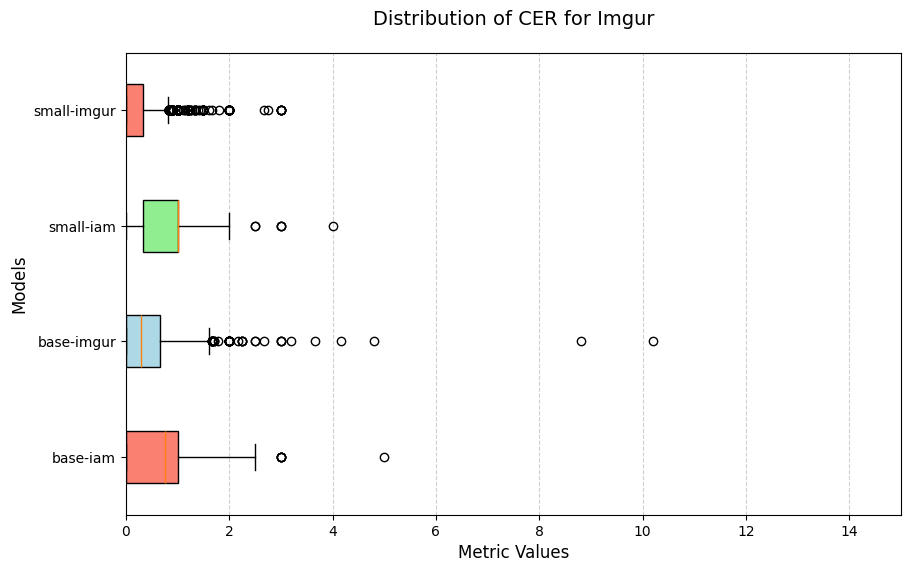

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract data for plotting
data_to_plot = [df["metrics"] for df in results.values()]
labels = list(results.keys())

# Create horizontal box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(
    data_to_plot,
    tick_labels=labels,
    vert=False,  # Horizontal box plot
    patch_artist=True,  # Fill boxes with color
)

# Customize colors (optional)
colors = [ 'salmon','lightblue','lightgreen', 'salmon','lightblue','lightgreen', ]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set x-axis range (0 to 20)
plt.xlim(0, 15)

# Add labels and title
plt.xlabel("Metric Values", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title("Distribution of CER for Imgur", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_eval(values):
    # Plotting
    plt.figure(figsize=(8, 5))
    sns.kdeplot(values, fill=True)
    plt.xlabel("Edit Distance")
    plt.title("KDE of Edit Distances")
    plt.show()
        
    # Boxplot
    plt.boxplot(values, vert=False, patch_artist=True)
    plt.xlabel("Edit Distance")
    plt.title("Boxplot of Edit Distances")
    
    plt.tight_layout()
    plt.show()

microsoft-base-handwritten


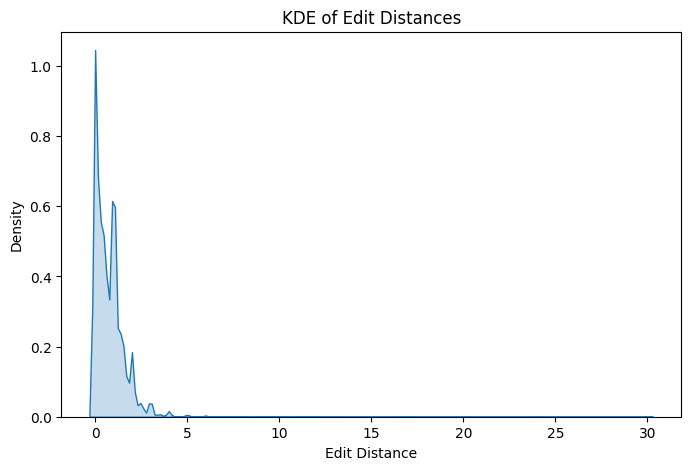

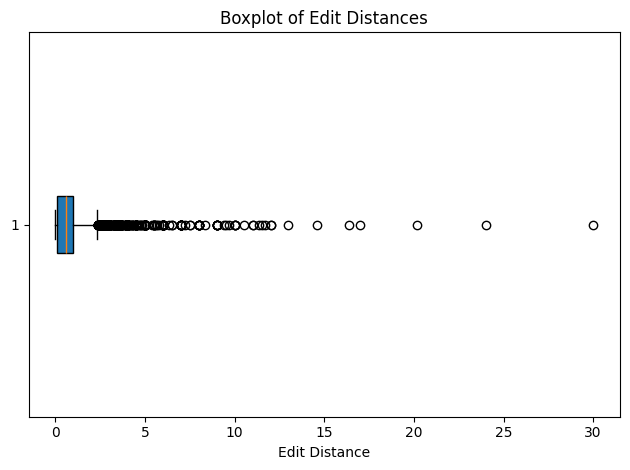


microsoft-small-handwritten


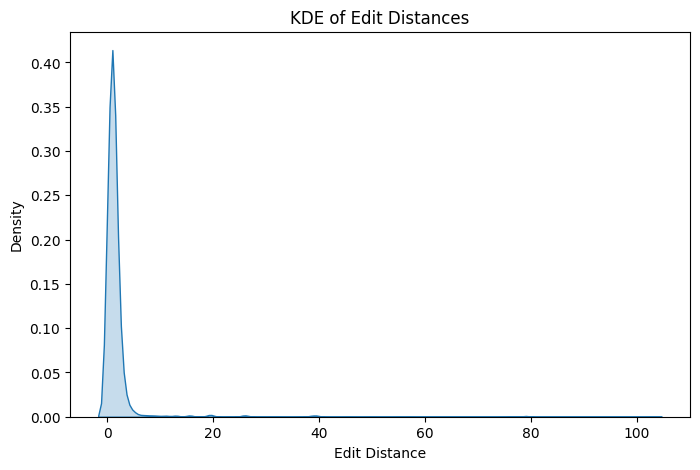

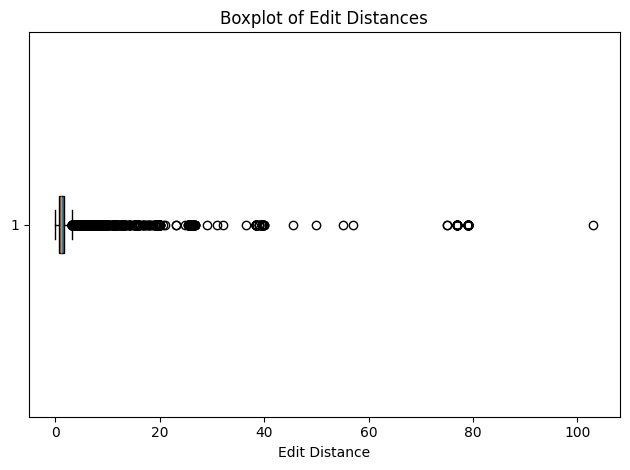

In [29]:
for k, v in results.items():
    print(k)
    plot_eval(v["metrics"])
    print()

## Step 2. Intersection Analysis

### 2.1 Length vs Accuracy

In [44]:
def len_acc(res):
    combined_df = pd.concat(
        [df.assign(model=name) for name, df in res.items()],
        ignore_index=True
    )
    combined_df['text_length'] = combined_df['true_text'].str.len()
    # 2. Group by model and text_length, then calculate mean CER
    grouped_df = combined_df.groupby(['model', 'text_length'])['metrics'].mean().reset_index()
    
    # 3. Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(  # Using lineplot to connect the average points
        data=grouped_df,
        x='text_length',
        y='metrics',
        hue='model',
        style='model',
        markers=True,  # Show markers at each average point
        dashes=False,  # Use solid lines
        markersize=10,
        palette='tab10'  # Color palette
    )
    
    # Customize the plot
    plt.title('Average CER by Text Length Group', fontsize=16)
    plt.xlabel('Length of True Text (characters)', fontsize=12)
    plt.ylabel('Average Character Error Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Move legend outside the plot area
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    plt.show()

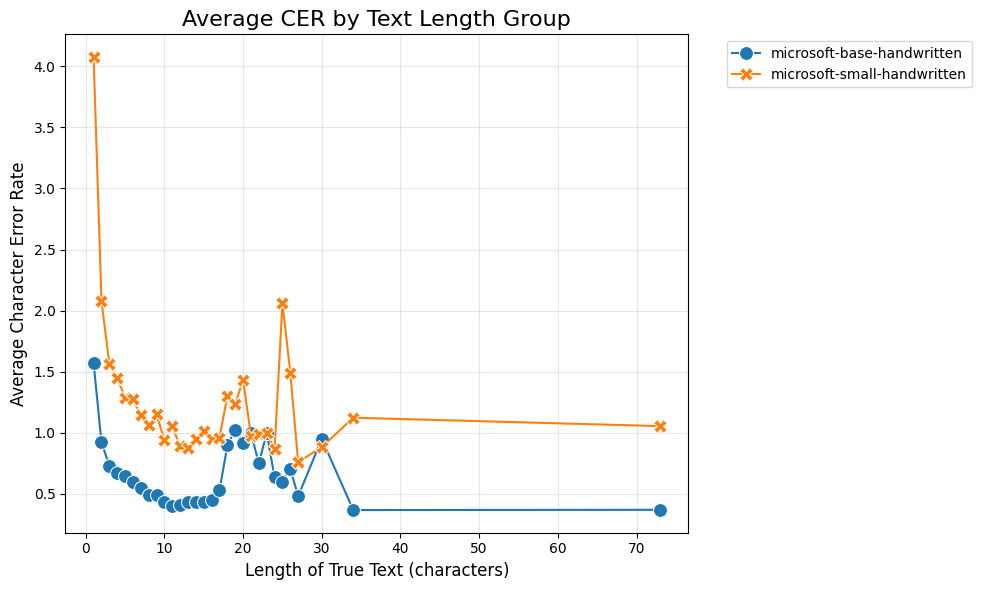

In [45]:
len_acc(results)